In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ds = pd.read_csv(r"C:\Users\mouav\OneDrive\Desktop\carprice\car_price.csv")

In [91]:
ds.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,,company_name,manufacture year
0,426,100300.0,86226,1,Manual,1,86226,5,Jeep,Jeep,1970
1,509,128300.0,13248,4,Automatic,1,13248,5,Renault,Renault,1970
2,290,164000.0,60343,4,Automatic,1,60343,5,Toyota,Toyota,1970


# Data Analysis Cleaning

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [19]:
# Removing unused column
ds.drop('Unnamed: 0', axis=1, inplace=True)

In [92]:
ds.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,,company_name,manufacture year
0,426,100300.0,86226,1,Manual,1,86226,5,Jeep,Jeep,1970
1,509,128300.0,13248,4,Automatic,1,13248,5,Renault,Renault,1970
2,290,164000.0,60343,4,Automatic,1,60343,5,Toyota,Toyota,1970


In [7]:
ds.describe()

,Unnamed: 0,manufacture
count,5512.000000,5512.000000
mean,2755.500000,2015.455552
std,1591.321673,3.927974
min,0.000000,1995.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2022.000000


#CAR_NAME

In [8]:
ds['car_name']

0       Jeep Compass 2.0 Longitude Option BSIV
1                 Renault Duster RXZ Turbo CVT
2                           Toyota Camry 2.5 G
3                            Honda Jazz VX CVT
4             Volkswagen Polo 1.2 MPI Highline
                         ...                  
5507                   BMW X1 sDrive 20d xLine
5508                     BMW M Series M4 Coupe
5509                Jaguar XF 2.2 Litre Luxury
5510                        BMW 7 Series 730Ld
5511                 BMW 5 Series 520d M Sport
Name: car_name, Length: 5512, dtype: object

In [9]:
ds['car_name'][0]

'Jeep Compass 2.0 Longitude Option BSIV'

In [10]:
#Separating name of company and car model using slicing

In [11]:
x =ds['car_name'][0]
x[:x.index(" ")]

'Jeep'

In [12]:
def company_name(x):
    return x[:x.index(" ")]

In [21]:
ds["company_name"]=ds["car_name"].apply(company_name)

In [93]:
ds.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,,company_name,manufacture year
0,426,100300.0,86226,1,Manual,1,86226,5,Jeep,Jeep,1970
1,509,128300.0,13248,4,Automatic,1,13248,5,Renault,Renault,1970
2,290,164000.0,60343,4,Automatic,1,60343,5,Toyota,Toyota,1970


In [27]:
def car2_name(x):
    return x[x.index(" ")+1:]

In [29]:
 ds["car_name"]=ds["car_name"].apply(car2_name)

#car_prices_in_rupee

In [ ]:
# We have to set price in one format instead of Lakh, Crore and Thousands

In [35]:
ds['car_prices_in_rupee']=ds['car_prices_in_rupee'].str.replace(",","")

In [ ]:
#

In [46]:
def rupe_change(x):
    p=x.split(" ")
    try:
        if p[1] == "Lakh":
            return str(round(float(p[0])*10000,1))
        elif p[1] =="Crore":
            return str(round(float(p[0])*10000000,1))
    except :
         return x
    

In [48]:
ds['car_prices_in_rupee']=ds['car_prices_in_rupee'].apply(rupe_change)

In [51]:
ds['car_prices_in_rupee']

0       100300.0
1       128300.0
2       164000.0
3        77700.0
4        51500.0
          ...   
5507    289000.0
5508    649000.0
5509    137500.0
5510    299000.0
5511    319000.0
Name: car_prices_in_rupee, Length: 5512, dtype: object

In [ ]:
# Above Our data of price now changed into one format

In [50]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5389 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
 9                        5512 non-null   object
 10  company_name         5512 non-null   object
dtypes: int64(1), object(10)
memory usage: 473.8+ KB


In [52]:
# You can see that now it's data type os object we have to change in int64

In [55]:
ds['car_prices_in_rupee']=ds['car_prices_in_rupee'].astype('float64')

# KMS_DRIVEN

In [57]:
ds['kms_driven']=ds['kms_driven'].str.replace(",","")
ds['kms_driven']=ds['kms_driven'].str.replace(" kms","")

In [ ]:
# Our data now converted into good format and chnged it's data type

In [59]:
ds['kms_driven'].astype("int64")

0       86226
1       13248
2       60343
3       26696
4       69414
        ...  
5507    45000
5508    29000
5509    90000
5510    79000
5511    42000
Name: kms_driven, Length: 5512, dtype: int64

# Engine

In [65]:
ds['engine']=ds['engine'].str.replace(" cc","")
ds['engine'].astype("int64")

0       86226
1       13248
2       60343
3       26696
4       69414
        ...  
5507    45000
5508    29000
5509    90000
5510    79000
5511    42000
Name: engine, Length: 5512, dtype: int64

In [64]:
ds['Seats']=ds['Seats'].str.replace(" Seats","")
ds['Seats'].astype("int64")

0       5
1       5
2       5
3       5
4       5
       ..
5507    7
5508    5
5509    5
5510    6
5511    5
Name: Seats, Length: 5512, dtype: int64

# Data Cleaning for Machine Learning

# Encoding Process

In [74]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# CAR_NAME

In [76]:
car_name_enc = LabelEncoder()
car_name_enc.fit_transform(ds['car_name'])


array([ 426,  509,  290, ..., 1713,   25,   13])

In [77]:
ds['car_name'] =car_name_enc.fit_transform(ds['car_name'])

# FUEL_TYPE

In [85]:
fuel_type_enc = LabelEncoder()
ds['fuel_type']=fuel_type_enc.fit_transform(ds['fuel_type'])

# Transmission

In [97]:
transmission_enc = LabelEncoder()
ds['transmission']=transmission_enc.fit_transform(ds['transmission'])

# Ownership

In [86]:
ownership_enc = LabelEncoder()
ds['ownership']= ownership_enc.fit_transform(ds['ownership'])

In [88]:
ds['manufacture year']= ds['manufacture'].dt.year

In [90]:
# Removing unused column
ds.drop('manufacture', axis=1, inplace=True)

# Company_Name

In [95]:
comp_name_enc = LabelEncoder()
ds['company_name']= comp_name_enc.fit_transform(ds['company_name'])

In [98]:
ds.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,,company_name,manufacture year
0,426,100300.0,86226,1,1,1,86226,5,Jeep,12,1970
1,509,128300.0,13248,4,0,1,13248,5,Renault,26,1970
2,290,164000.0,60343,4,0,1,60343,5,Toyota,29,1970
3,912,77700.0,26696,4,0,1,26696,5,Honda,8,1970
4,1095,51500.0,69414,4,1,1,69414,5,Volkswagen,30,1970


# Checking_Outlier

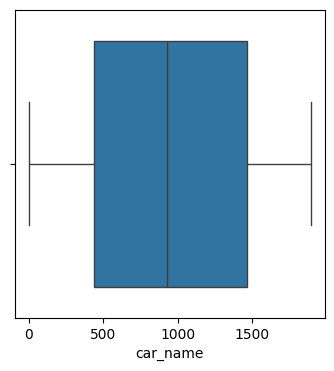

In [101]:
plt.figure(figsize =(4,4))
sns.boxplot(x='car_name',data = ds)
plt.show()

In [102]:
# I just show how to check outlier , but here not need to check
# It's depend upon our data